# Natural Language Processing - Final project

___ 

Author: César Caramazana Zarzosa (ccaramaz@pa.uc3m.es)

Date: 27/04/2023

**INTRODUCTION**

In this final project of Natural Language Processing we will be carrying a variety of tasks related to the most important topics we have covered during the course.

We will build an ad hoc corpus from the *News Category Dataset*, publicly available at [Kaggle](https://www.kaggle.com/datasets/rmisra/news-category-dataset). It contains 210k news headlines from 2012 to 2018 from [HuffPost](https://www.huffpost.com/), aswell as a brief description, the author, the date and a label on the category of the piece of news. 

## Imports

In [ ]:
#Mount Drive
path_to_folder = '/content/drive/My Drive/MASTER/NLP/Project'
import os
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

# Change to assignment directory
os.chdir(path_to_folder) 

Mounted at /content/drive


In [ ]:
#General libraries
import numpy as np
import pandas as pd
import zipfile as zp
from termcolor import colored
import seaborn as sn
import time
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
#To wrap long text lines
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)
%load_ext google.colab.data_table




In [ ]:
#Gensim
!pip install --upgrade gensim==3.8.3

from gensim.models.phrases import Phrases
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaMallet
from gensim.models.wrappers.ldamallet import malletmodel2ldamodel
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models import FastText

class IterableSentence_fromfile(object):
    def __init__(self, filename):
        self.__filename = filename
    
    def __iter__(self):
        for line in open(self.__filename):
            # assume there's one sentence per line, tokens separated by whitespace
            yield line.split()

# Mallet
import os       #importing os to set environment variable
def install_java():
    !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
    os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
    !java -version       #check java version
install_java()

#For visualization
!pip install pyLDAvis==2.1.2
import pyLDAvis.gensim as gensimvis
import pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 61.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26528053 sha256=ad517960c0185730bcc02eb01a7ab5a62d6e19e745936db5f1ba86ab582148c1
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1
openjdk version "11.0.18" 2023-01-17
OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#Scikit

#Preprocessing: normalization, split, categorical label encoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from collections import Counter #To count how many samples of each class
from sklearn.preprocessing import LabelEncoder

#Cross validation
from sklearn.model_selection import GridSearchCV

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#Metrics 
from sklearn import metrics



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# From the Hugging Face tutorial
import importlib, os

necessary_packages = ['transformers[sentencepiece]', 'datasets', 'gradio', 'colored', 'wikipedia', 'evaluate', 'nltk', 'rouge_score']
def import_missing(packages):
  for p in packages:
    try:
      mod = importlib.import_module(p)
      print(f"Package {p} already installed!")
      packages.remove(p)
    except ModuleNotFoundError:
      print(f"Installing package {p}")
      with open("requirements.txt", 'w') as f:
        f.write("\n".join(str(i) for i in packages))
  if os.path.isfile("requirements.txt"):
    %pip install --quiet -r "requirements.txt"

import_missing(necessary_packages)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Installing package transformers[sentencepiece]
Installing package datasets
Installing package gradio
Installing package colored
Installing package wikipedia
Installing package evaluate
Package nltk already installed!
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 81.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
# Supress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **0. DATA ACQUISITION AND PREPROCESSING PIPELINE**

**IMPORTANT NOTE**: this section was executed in a different notebook and the output was saved in a .json file that is directly loaded in section 1. This is mainly due to the fact that the retrieval from the web (0.1) took several hours and had to be done in chunks of 500 samples at the time, instead of all 16.5k at once, as it is defined here. 

___

Given that the headline and the short description is just a few words long --which would hinder some of the tasks, particularily Topic Modeling--, we are going to **generate a subpartition of the dataset with the whole body of the articles**, retrieved from the original source website. 

Then, we'll clean the text, and save the processed data in a new file to avoid having to execute these cells every time (which are very time consuming). 

In [ ]:
#Load the original News Category dataset
df = pd.read_json('./Dataset/News_Category_Dataset_v3.json', lines=True)

### 0.1 Website retrieval

The following function retrieves the text tagged as ```<p>``` in the HTLM of a website. 

In [ ]:
import requests
from bs4 import BeautifulSoup

def retrieve_text(url):
  """
  Retrieves the text of a website (tagged as <p> in the HTML source).

  Args:
    url: (str) link to the website.

  Returns:
    output: (str) retrieved text.  

  """
  res = requests.get(url)
  html_page = res.content
  soup = BeautifulSoup(html_page, 'html.parser')
  text = soup.find_all(text=True)

  output = ''

  for t in text:
    if t.parent.name == 'p':
        output += '{} '.format(t)

  return output


We apply the retrieval to the first 16.5k\* entries of the dataframe.



In [ ]:
# 1) Select first 16500 entries
df_short = df[0:16500]


# 2) Apply URL retrieval
df_short['news_corpus'] = df_short['link'].apply(retrieve_test)

\* *We take only 16.5k samples instead of the whole 210k due to: 1) the unavailability of some of the samples after the HuffPost stopped maintaining an archive, which doesn't allow us to fully automate the retrieval, 2) time constraints, as the process takes a few hours and Colab is prone to disconnections, and 3) pragmatism since, as we will see, the final corpus will contain more than enough samples to carry out the tasks.*

### 0.2 Text preprocessing

The rawtext is processed through the following pipeline that returns the lemmatized lowercased tokens after applying valid Part-of-Speech filtering and stopword removal.

We realized that every entry contained a disclaimer: "*By entering your email and clicking Sign Up, you're agreeing to let us send you customized marketing messages about us and our advertising partners*", which was eliminated via specific stopword removal as it hindered the LDA topic modeling task.

In [ ]:
!python -m spacy download en_core_web_md

nlp = spacy.load('en_core_web_md')
nlp.disable_pipe('parser')
nlp.disable_pipe('ner')

valid_POS = set(['VERB', 'NOUN', 'ADJ', 'PROPN'])
specific_stw = set(['agreeing', 'email', 'people', 'year','man', 'new','woman',
                    'clicking', 'say','sign','message', 'advertising', 'let', 'send', 
                    'reporter', 'click', 'enter', 'sign', 'customized', 'messages', 'twitter', 
                    'editor', 'huffpost', 'agree', 'customize', 'marketing', 'partner'])

def text_preprocessing(rawtext):
    """
    Cleans an input raw text applying the following steps:
      - Part-of-Speech filtering (keeping verbs, nouns, pronouns and adjectives)
      - Alpha numeric filtering
      - Generic stopword removal
      - Specific stopword removal
      - Lemmatization
      - To lower-case

    Args:
      rawtext: (str) text to preprocess.

    Returns:
      lemma: (list) lemmatized tokens as list.    
    
    """
  
    doc = nlp(rawtext)

    lemma = [token.lemma_.lower() for token in doc if token.is_alpha 
             and token.pos_ in valid_POS 
             and not token.is_stop 
             and token.lemma_.lower() not in specific_stw]
    
    return lemma

The cleaned text is stored as a column in the dataframe. The dataframe is saved as a json file for further reuse.

In [ ]:
# 1) Join the headline and the corpus
df_short['news'] = (df_short['headline'] + '. ' + df_short['news_corpus']).astype(str)

# 2) Apply cleaning pipeline
df_short['news_clean'] = df_short['news'].apply(text_preprocessing)


# 3) Save the dataframe in a json file
path = './Dataset/Final_NewsCorpus_Clean.json'
df_short.to_json(path)

## **1. DATA LOADING**

Load the data we preprocessed in section 0. as a Pandas dataframe.

In [ ]:
# Read dataframe
corpus_df = pd.read_json('./Dataset/Final_NewsCorpus_Clean.json')

# Corpus
mycorpus = [doc for doc in corpus_df['news_clean']]

print("The corpus contains %1i documents. " %len(corpus_df))

The corpus contains 16499 documents. 


\* *NOTE: one entry was removed because it yielded an error in the word embedding vectorization*.

### 1.1 Preprocessing

The only preprocessing we do to the final corpus is bi-gram detection, as many terms in the *News Dataset* are diadic and appear very often. For example: 'White House', 'United States', 'Health Care', etc (see section 1.2).

We also tried to detect tri-grams such as 'New York City' or 'President Donald Trump', but we discarded it after not being able to select a proper threshold to avoid false positives.

In [ ]:
# 1) N-gram detection

#Bigrams
phrase_model = Phrases(mycorpus, min_count=2, threshold=10)
mycorpus = [el for el in phrase_model[mycorpus]]

### 1.2 Data analysis


1) **Distribution of documents per labeled *CATEGORY*.**

The original dataset presented 42 categories. Our subpartition only contains 35.

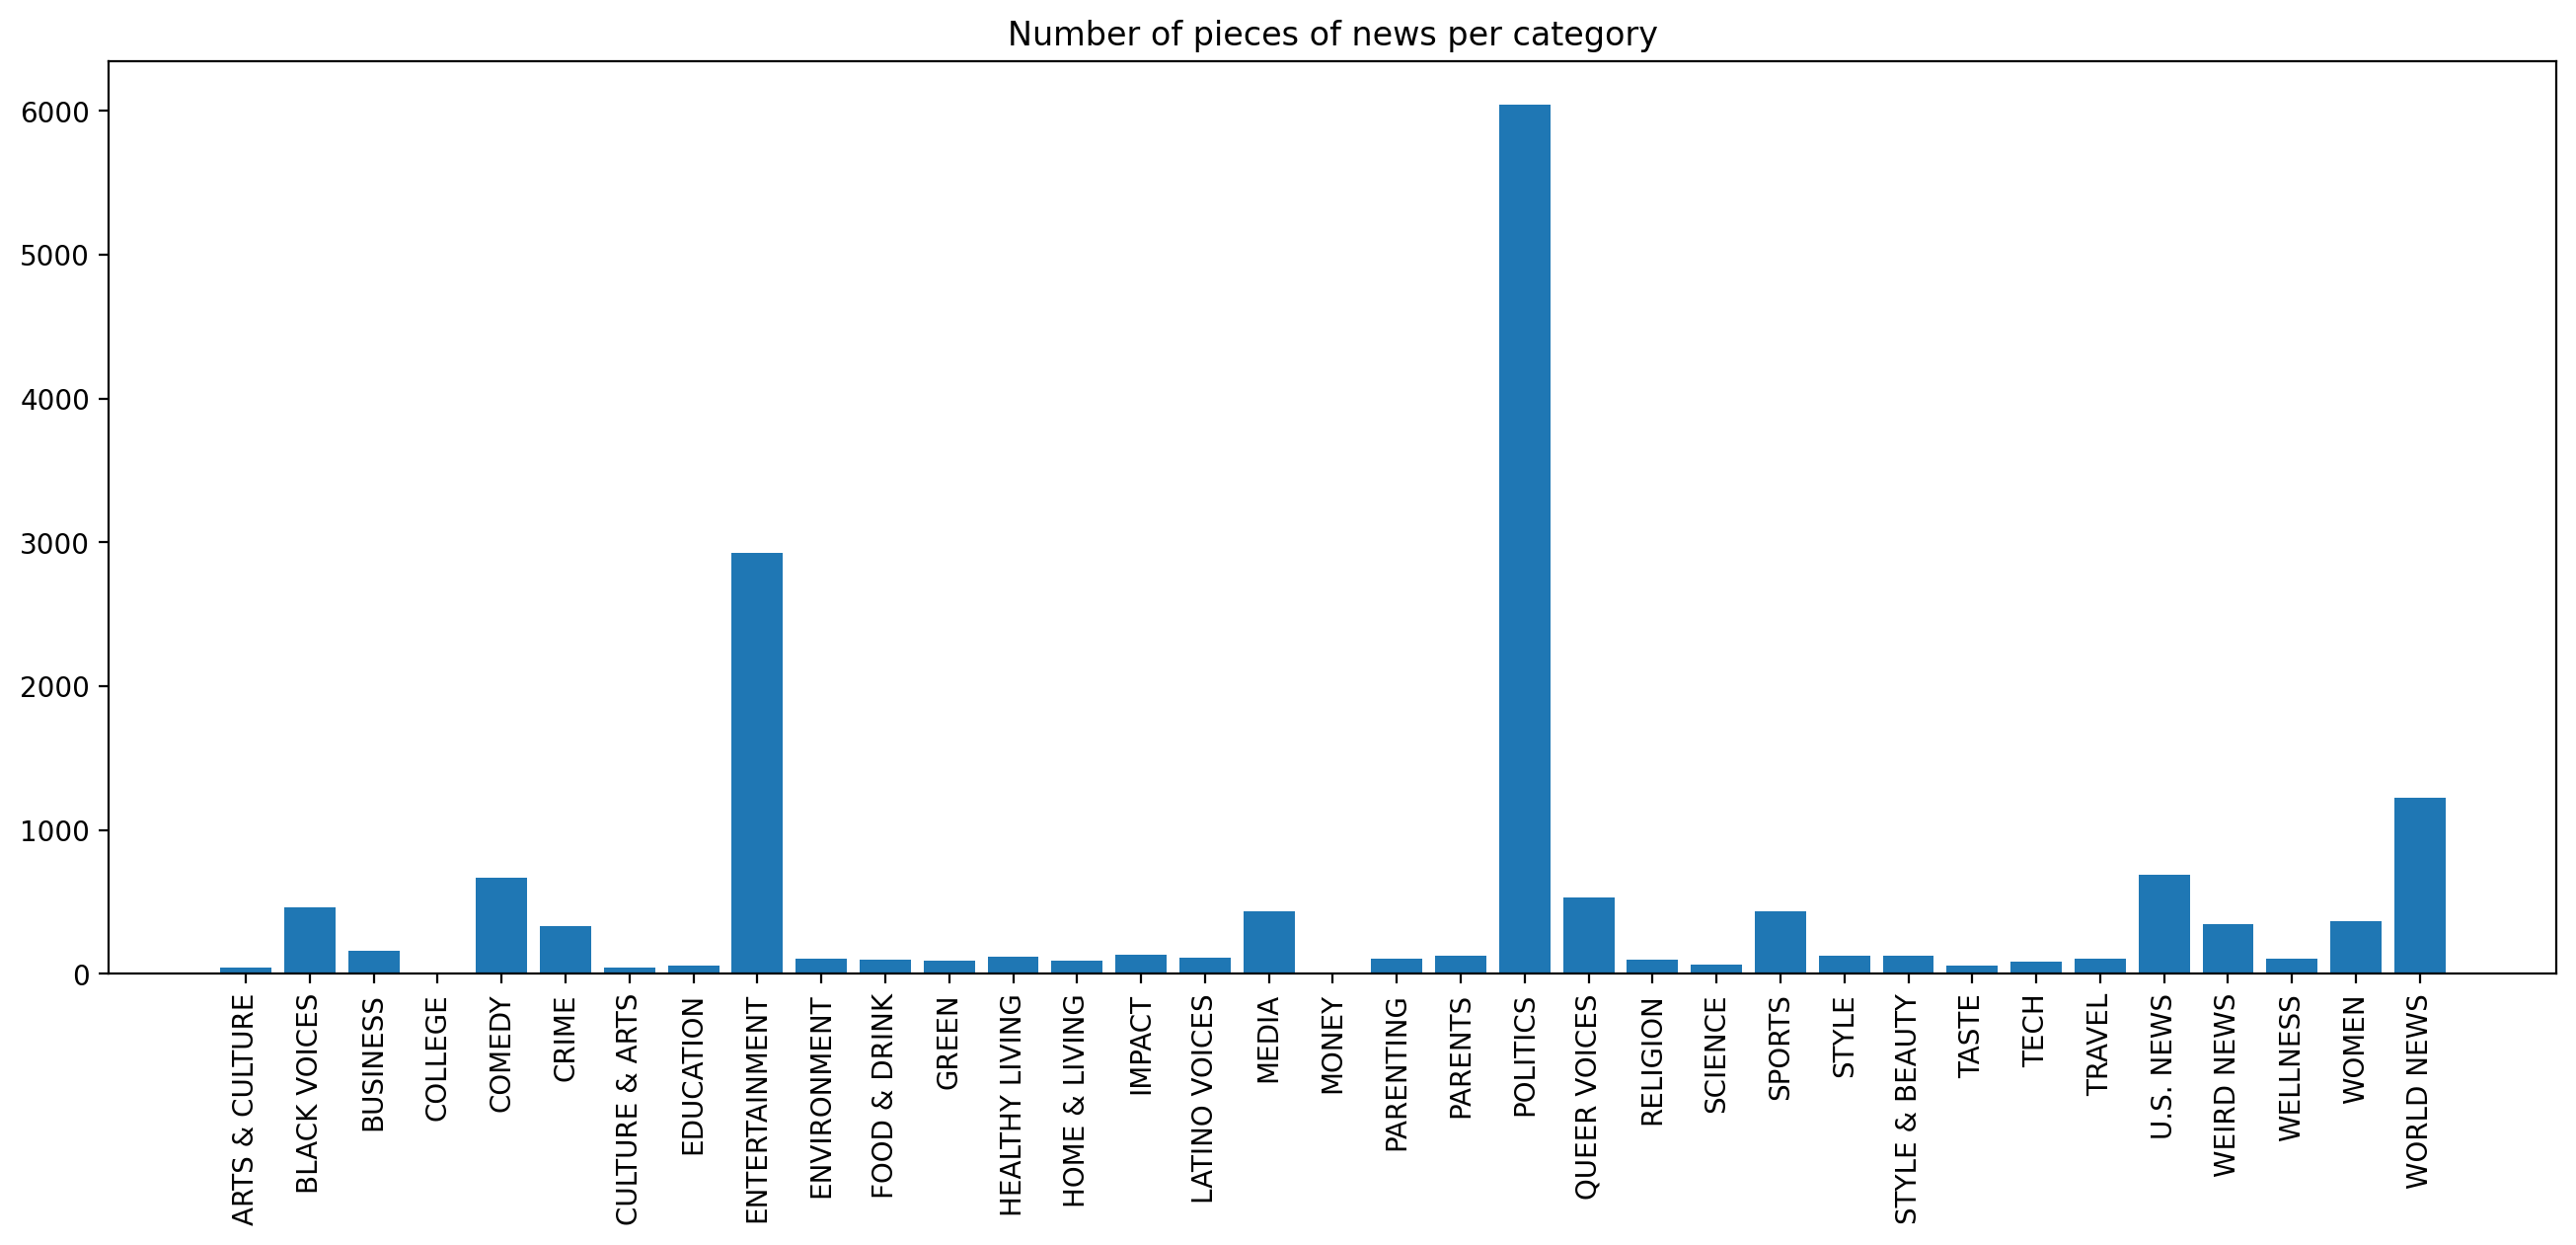

In [ ]:
categories = np.unique(corpus_df['category'])
num_news = []

for cat in categories:
  num_news.append(len(np.where(corpus_df['category'] == cat)[0]))

plt.figure(figsize=(16,6))
plt.title("Number of pieces of news per category")
plt.bar(categories, num_news)
#plt.yscale('log')
plt.xticks(ticks=range(len(categories)), labels=categories, rotation=90)
plt.show()



The dataset is **highly imbalanced**, with the category *POLITICS* representing almost the 50\% of the samples. The second and third most represented categories are *ENTERTAINMENT* and *WORLD NEWS*, which are very generic categories in comparison with the more specific *LATINO VOICES* or *TECH*, which barely have a few dozens of samples.



It is also worth mentioning that the HuffPost is an American newsletter, and therefore all the content is biased towards the reality of the United States, even if there is a specific *U.S. NEWS* category.

2) **N-grams**

In [ ]:
tokens_Ngrams = []

for doc in mycorpus:
  for token in doc:
    if '_' in token:
      tokens_Ngrams.append(token)

Ngrams, counts = np.unique(np.array(tokens_Ngrams), return_counts=True)

import pandas as pd

data = {'Ngram': Ngrams, 'Counts': counts}

Ngrams_df = pd.DataFrame(data)
Ngrams_df.sort_values(by=['Counts'], ascending=False, inplace=True)

# Top 10 most common N_grams
Ngrams_df.head(20)


,Ngram,Counts
48613,white_house,4905
46607,united_states,2755
41446,social_medium,1801
45981,trump_administration,1369
13118,donald_trump,1340
18195,general_assignment,1318
39892,senior_culture,1265
30512,north_korea,1184
43513,supreme_court,1049
26412,los_angeles,974


**3) Average number of words per doc**

Average number of words per article:  213.97466513122006


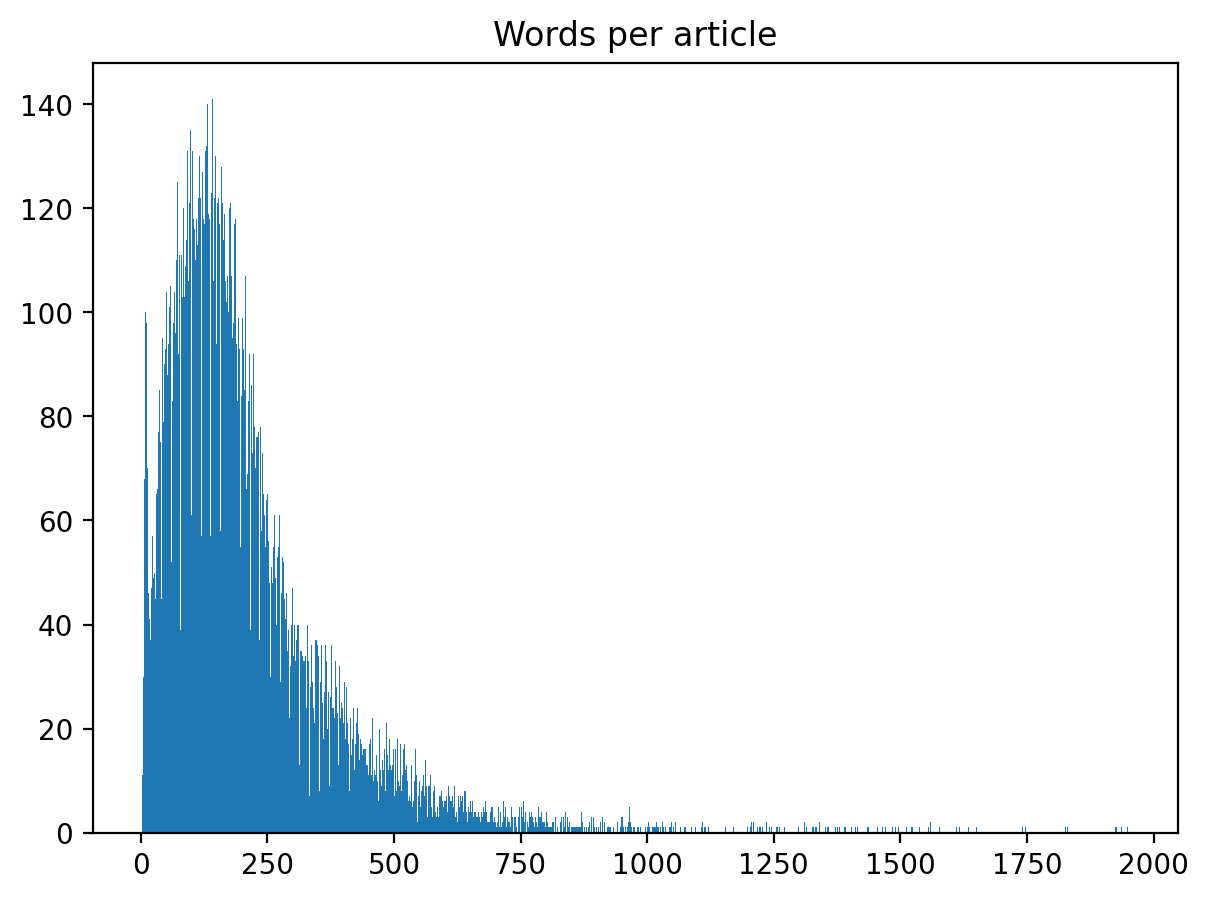

In [ ]:
n_words = []

for doc in mycorpus:
  n_words.append(len(doc))

print("Average number of words per article: ", np.mean(np.array(n_words)))

#Filter out extreme to better visualize the histogram
n_words = [n for n in n_words if n < 2000]  
plt.figure(figsize=(7,5))
plt.title("Words per article")
plt.hist(n_words, bins=1024)
plt.show()



## **2. VECTOR REPRESENTATIONS**

In this section we perform the vectorization of the document via: Bag-of-words, TFIDF, document embedding, LDA topic modeling and Neural topic modeling.

### 2.1 Dictionary and BoW

After creating the dictionary, we filter out very uncommon terms (that appear in less than 10 articles) and very common ones (on more than 80% of the articles). This is useful not only to reduce the dimensionality of the TFIDF matrix, but also for a better result in the topic modeling task.

In [ ]:
no_below = 10 #Minimum number of documents to keep a term in the dictionary
no_above = .80 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

D = Dictionary(mycorpus)
D.filter_extremes(no_below=no_below,no_above=no_above)

mycorpus_bow = [D.doc2bow(doc) for doc in mycorpus]

print("Dictionary contains %i words" %len(D))

Dictionary contains 21184 words


### 2.2 TFIDF

The TF-IDF matrix is directly calculated from the BoW representation.

In [ ]:
tfidf = TfidfModel(mycorpus_bow)

mycorpus_tfidf = tfidf[mycorpus_bow]

### 2.3 Word Embeddings

Here we train a Fast Text model with embedding size = 200. The keyed vectors are then saved for better re-use.

In [ ]:
from gensim.models import FastText

# 1) Obtain w2v model and save it
model_fasttext = FastText(sentences=mycorpus, size=200, window=5, min_count=2, seed=42)

#Save Fast Text model with vector_size = 200
wv = model_fasttext.wv
wv.save("./W2V/fasttext_200.wordvectors")

import gc
del model_fasttext
gc.collect()

In [ ]:
# 2) Load keyed vectors

wv = KeyedVectors.load("./W2V/fasttext_200.wordvectors", mmap='r')

There are many strategies we could implement a function to obtain the embedding of a document. Here, we compute the doc embedding V as **the tfidf-weighted average of the word embeddings**. That is, for each word in a document, we multiply its embedding times its tf-idf factor. Then, add all the embeddings together and divide by the document length.


<p><center>
$V(doc) = \frac{1}{Nwords}\sum_{word}^{} tfidf(word, doc)V(word)$

</center></p>


With this approach we aim to module the contribution of common/uncommon terms in the embedding space.


In [ ]:
# 3) Get single embedding as mean of word embeddings in the News text

def get_mean_vector(model, doc_tfidf, D):
  """
  Calculates a document embedding representation by weighting the embeddings of the words with their tf-idf factor.

  Args:
    model: (word vectors) word2vec model with the embeddings of all the words.
    doc_tfidf: (list) list containing the tf-idf weights of the document. 
    D: (dictionary) dictionary obtained from the corpora.

  Returns:
    vec: (np.array) document embedding.  

  """
 
  embeddings = []
  eps = 1e-9
  for i in doc_tfidf:
    # 1) Word embedding
    word = D[i[0]]
    word_emb = model[word]

    # 2) TDIDF weight
    weight = i[1]

    # 3) Weighted embedding
    embeddings.append(word_emb * weight + eps)

  #print(len(embeddings))
  vec = np.mean(np.asarray(embeddings), axis=0)

  return vec

In [ ]:
# 4) Create matrix of size [N_docs, embedding_size] with the mean embedding of each doc

embedding_size = wv.vector_size
N_news = len(mycorpus)

X_w2v = np.zeros((N_news, embedding_size))

for i in range(len(mycorpus_tfidf)):  
  vec = get_mean_vector(wv, mycorpus_tfidf[i], D)

  X_w2v[i] = vec

### 2.4 LDA Topic modeling


In this section we carry out a Latent Dirichlet Allocation topic modeling. To select the number of topics, we first perform a search over a set of values, ```[15, 20, 30, 35, 40, 45, 50, 60, 70]```, a keep the one that yields the highest coherence. 

*NOTE: this search was executed several times (to iteratively improve the preprocessing pipeline) and the optimal value differed between 40, 45 and 50. By inspecting the contents of the topics in each case, we didn't notice a significant change.*

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

os.environ['MALLET_HOME'] = 'mallet-2.0.8'
mallet_path = 'mallet-2.0.8/bin/mallet' # you should NOT need to change this 

Estimating coherence for model with 15 topics ===========================
Coherence = 0.4762

Estimating coherence for model with 20 topics ===========================
Coherence = 0.4922

Estimating coherence for model with 30 topics ===========================
Coherence = 0.4988

Estimating coherence for model with 35 topics ===========================
Coherence = 0.4994

Estimating coherence for model with 40 topics ===========================
Coherence = 0.5027

Estimating coherence for model with 45 topics ===========================
Coherence = 0.4967

Estimating coherence for model with 50 topics ===========================
Coherence = 0.4874

Estimating coherence for model with 60 topics ===========================
Coherence = 0.4975

Estimating coherence for model with 70 topics ===========================
Coherence = 0.4791



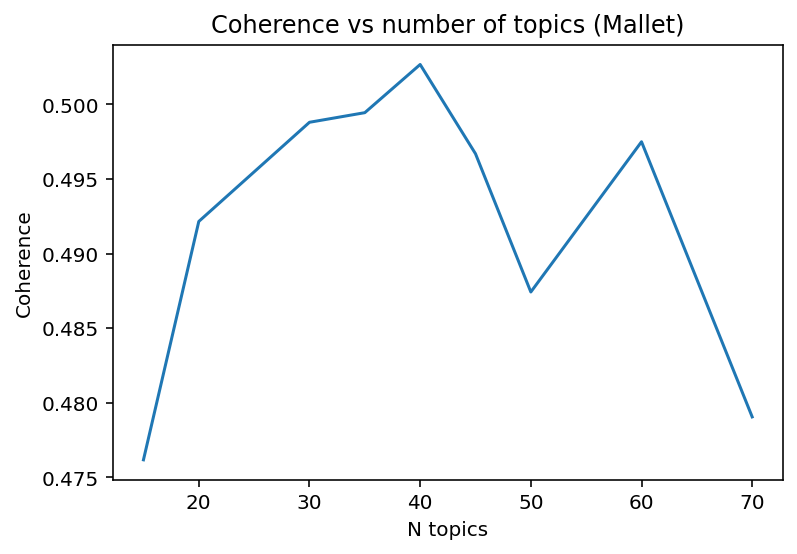

In [ ]:
# Mallet LDA

n_topics = [15, 20, 30, 35, 40, 45, 50, 60, 70]

# 1) Select number of topics based on coherence score
coherence =[]
for n in n_topics:
  ldamallet = LdaMallet(mallet_path, corpus=mycorpus_bow, num_topics=n, id2word=D, alpha=5, iterations=50)
  ldagensim = malletmodel2ldamodel(ldamallet)

  coherencemodel = CoherenceModel(ldagensim, texts=mycorpus, dictionary=D, coherence='c_v')

  print("Estimating coherence for model with %i topics ===========================" %n)
  c = coherencemodel.get_coherence()
  coherence.append(c)

  print("Coherence = %4.4f" %c)
  print()

plt.title("Coherence vs number of topics (Mallet)")
plt.plot(n_topics, coherence)
plt.xlabel("N topics")
plt.ylabel("Coherence")

plt.show()

In [ ]:
# 2) Re-train model with highest coherence for more iterations

n_topic = n_topics[np.argmax(coherence)]
#n_topic = 50

print("Final number of topics: ", n_topic)


ldamallet = LdaMallet(mallet_path, corpus=mycorpus_bow, num_topics=n_topic, id2word=D, alpha=5, iterations=200)
ldagensim = malletmodel2ldamodel(ldamallet)

topics_in_doc = ldagensim.get_document_topics(mycorpus_bow)

Final number of topics:  40


Now we visualize the obtained topics and check if they relate to any of the categories we have in the labels or to any of the events that have been covered in the news during the past few years. 


In [ ]:
# 3) Visualize topic representation of corpus with LDAvis

vis_data = gensimvis.prepare(ldagensim, mycorpus_bow, D)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Some of the most easily identifiable topics are:

*   [28] Covid19 pandemic.
*   [38] Russia-Ukraine war.
*   [12] and [23] American presidential elections.
*   [4] Donald Trump.
*   [10] Movies, cinema, Hollywood. 
*   [35] Gun shootings.
*   [22] Racism.
*   [11] Sexual abuse/allegations.
*   [36] Education, schools, University. 
*   [39] Religion.
*   [26] Climate change.




## **3. CLASSIFICATION TASK**

In this part we will carry out a supervised classification task, using the different **document vector representations** we obtained in 2, and comparing the performance of **classical Machine Learning methods**, such as Support Vector Machines (SVM), Random Forests (RF) and Multilayer Perceptrons (MLP), with **fine-tuned Transformers** from the Hugging Face library. 

Performance will be evaluated in terms of accuracy and inference time. The confusion matrix will also be plotted for further analysis of the results in the report. 

### 3.1 Preprocessing

As we saw in 1.2, the dataset is highly unbalanced in terms of documents per category. In order to simplify the problem, we select *POLITICS*, *WORLD NEWS* and *ENTERTAINMENT* as stand alone classes and merge everything else into an *OTHER* class. 

In [ ]:
#Categorical labels
Y_cat = corpus_df['category'].values

Y = np.zeros((len(Y_cat)), dtype=int)

#Simplify the problem to 4 classes: 'OTHER': 0, 'POLITICS': 1, 'WORLD NEWS': 2, 'ENTERTAINMENT': 3
Y[np.where(Y_cat == 'POLITICS')] = 1
Y[np.where(Y_cat == 'WORLD NEWS')] = 2
Y[np.where(Y_cat == 'ENTERTAINMENT')] = 3

Yclasses = ["OTHER", "POLITICS", "WORLD NEWS", "ENTERTAINMENT"]

print(Counter(Y))

Counter({0: 6306, 1: 6042, 3: 2929, 2: 1222})


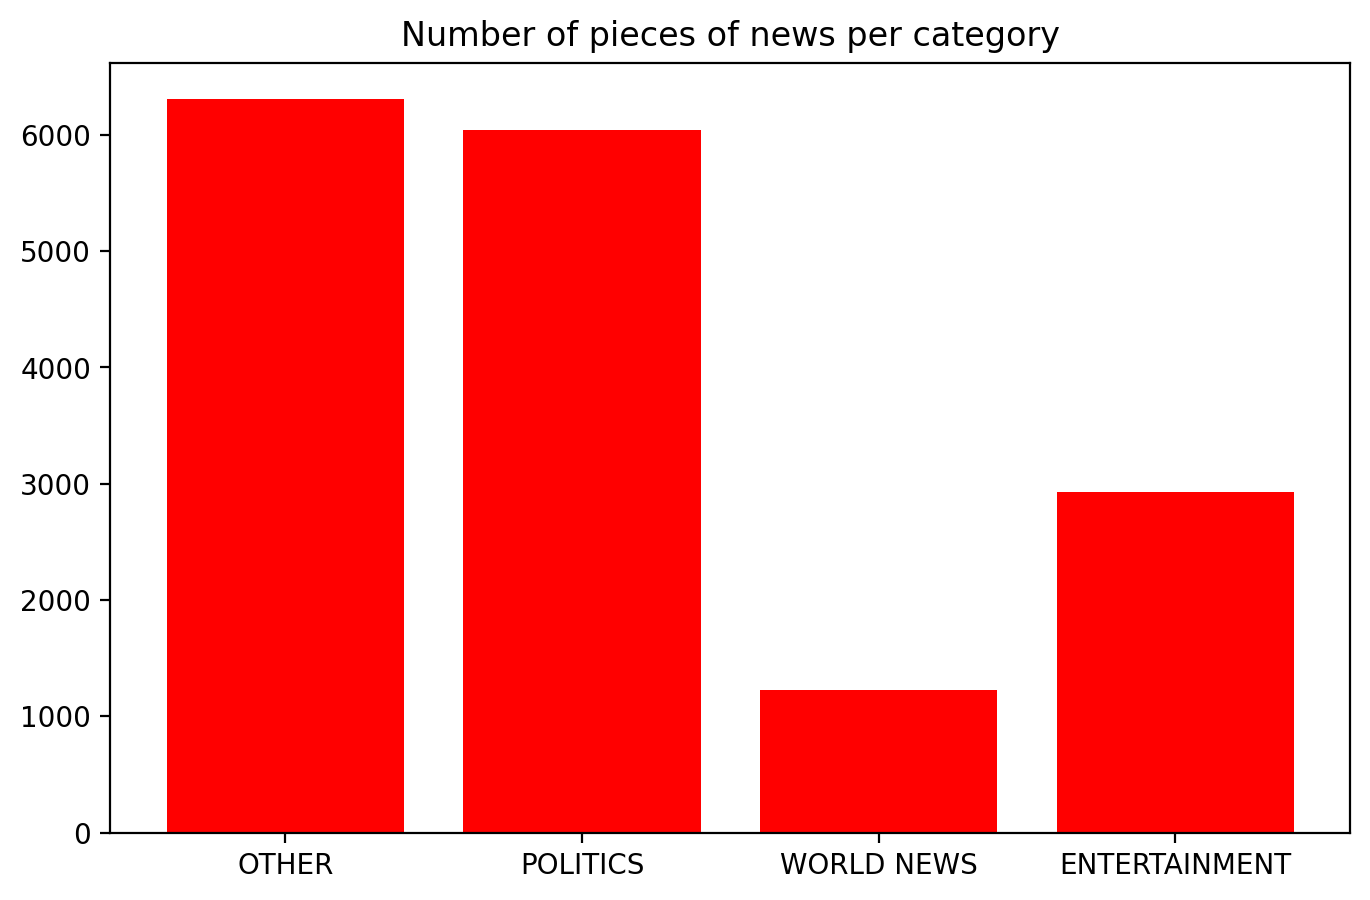

In [ ]:
categories = np.unique(Y)
num_news = []

for cat in categories:
  num_news.append(len(np.where(Y == cat)[0]))

plt.figure(figsize=(8,5))
plt.title("Number of pieces of news per category")
plt.bar(categories, num_news, color='r')
#plt.yscale('log')
plt.xticks(ticks=range(len(categories)), labels=Yclasses, rotation=0)
plt.show()

### 3.2 TFIDF

In [ ]:
from gensim.matutils import corpus2dense, corpus2csc
from scipy.sparse import lil_matrix, csr_matrix

#FROM SPARSE TO DENSE TFIDF REPRESENTATION
num_docs = D.num_docs
num_terms = len(D.keys())

tfidf_dense = np.transpose(corpus2dense(mycorpus_tfidf, num_terms, num_docs))

#BACK TO SPARSE
X_tfidf = lil_matrix(tfidf_dense)
print(X_tfidf.shape)


(16499, 21184)


In [ ]:
# TRAIN-TEST SPLIT
X_tfidf_train, X_tfidf_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size = 0.35, random_state = 42, stratify=Y)

print("Train: ", X_tfidf_train.shape[0])
print("Test: ", X_tfidf_test.shape[0])

Train:  10724
Test:  5775


#### 3.2.1 SVM

SVC(C=6)

Train accuracy = 0.9999 
Test accuracy = 0.7991

Average test inference time = 0.0093177 [s/sample]


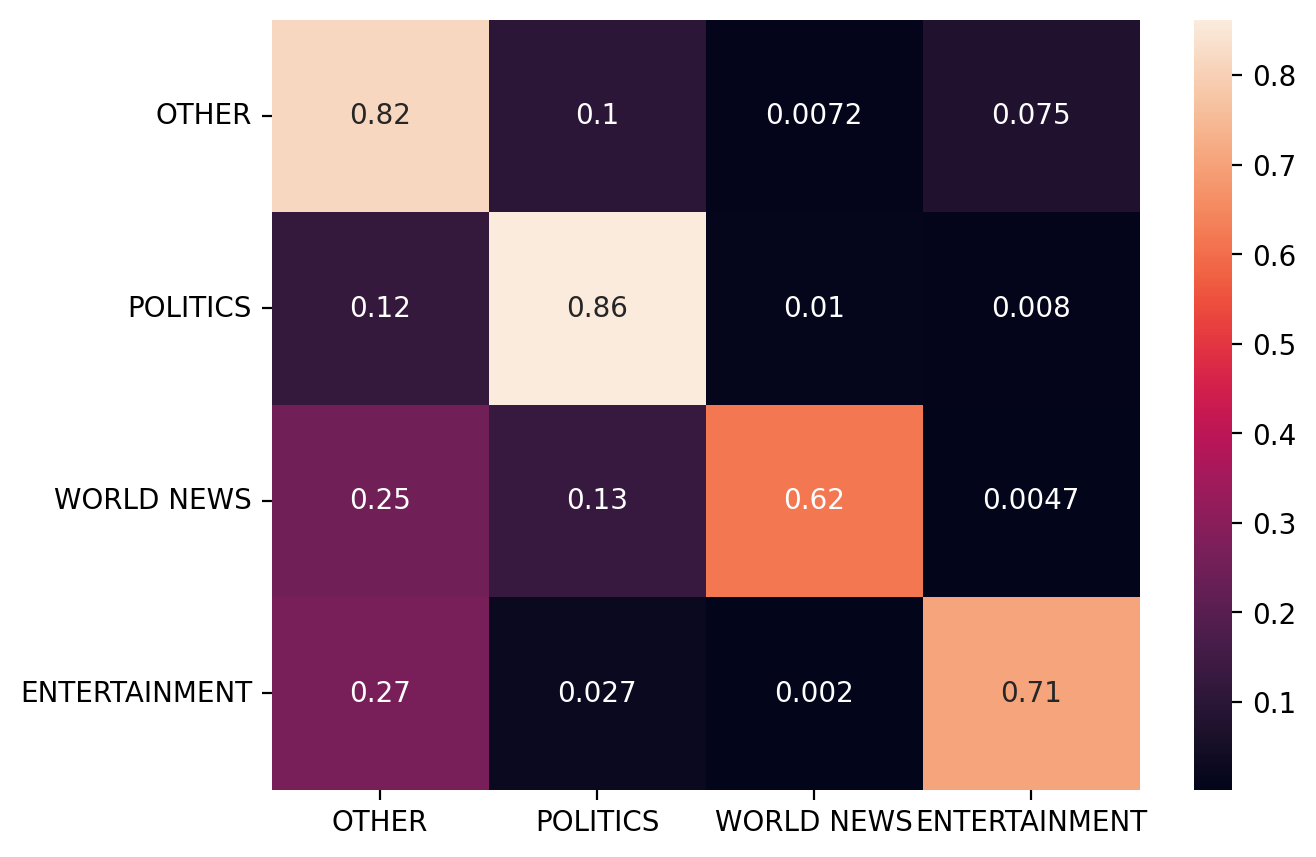

In [ ]:
rang_C = [1, 3, 6]
kernels = ['rbf']

tuned_parameters = {
    'C': rang_C,
    'kernel': kernels
}

clf = SVC()

svm = GridSearchCV(clf, param_grid=tuned_parameters, cv=5)

svm.fit(X_tfidf_train, Y_train)

print(svm.best_estimator_)


# -----------------------------------------------------------------
train_accuracy = svm.score(X_tfidf_train, Y_train)

tik = time.process_time()
test_accuracy = svm.score(X_tfidf_test, Y_test)
tok = time.process_time()

print("\nTrain accuracy = %.4f " %train_accuracy)
print("Test accuracy = %.4f" %test_accuracy)

print("\nAverage test inference time = %4.7f [s/sample]" %((tok-tik)/X_tfidf_test.shape[0]))

# Test confusion matrix
Y_pred = svm.predict(X_tfidf_test)

CM = metrics.confusion_matrix(Y_test, Y_pred, normalize='true')
plt.figure(figsize=(7,5))
sn.heatmap(CM, annot=True, xticklabels = Yclasses, yticklabels=Yclasses)
plt.show()

#### 3.2.2 Random Forest

RandomForestClassifier(max_depth=3, n_estimators=90)

Train accuracy = 0.5870 
Test accuracy = 0.5808

Average test inference time = 0.0000339 [s/sample]


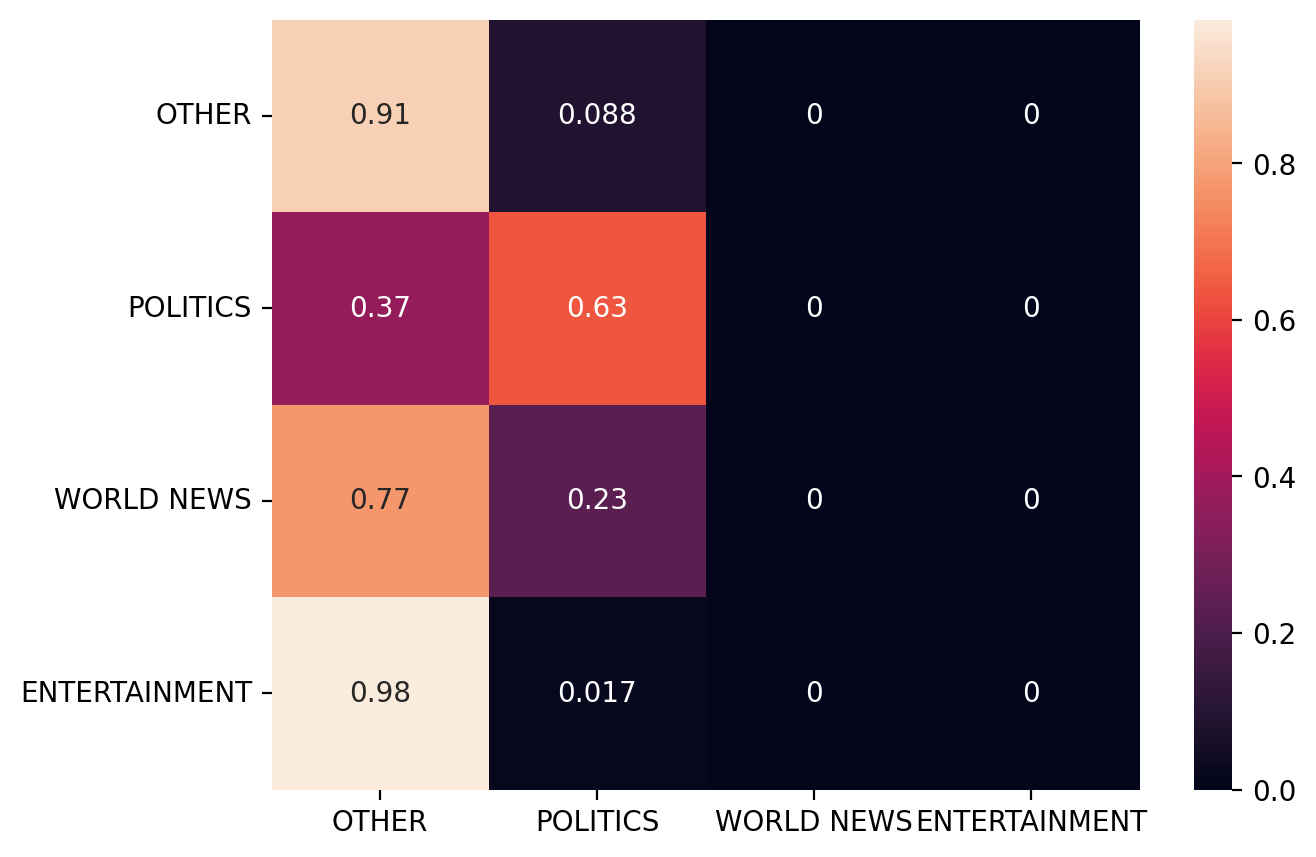

In [ ]:
T = 100
num_trees = range(5, T, 5)
depth = [2, 3]

tuned_parameters = {
    'n_estimators': num_trees,
    'max_depth': depth
}

clf = RandomForestClassifier()

rf = GridSearchCV(clf, tuned_parameters, cv=5)
rf.fit(X_tfidf_train, Y_train)

print(rf.best_estimator_)
# -----------------------------------------------------------------
train_accuracy = rf.score(X_tfidf_train, Y_train)

tik = time.process_time()
test_accuracy = rf.score(X_tfidf_test, Y_test)
tok = time.process_time()

print("\nTrain accuracy = %.4f " %train_accuracy)
print("Test accuracy = %.4f" %test_accuracy)

print("\nAverage test inference time = %4.7f [s/sample]" %((tok-tik)/X_tfidf_test.shape[0]))


# Test confusion matrix
Y_pred = rf.predict(X_tfidf_test)

CM = metrics.confusion_matrix(Y_test, Y_pred, normalize='true')
plt.figure(figsize=(7,5))
sn.heatmap(CM, annot=True, xticklabels = Yclasses, yticklabels=Yclasses)
plt.show()

#### 3.2.2 MLP

MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 256, 128),
              max_iter=1000, random_state=42)

Train accuracy = 0.9550 
Test accuracy = 0.7977

Average test inference time = 0.0000450 [s/sample]


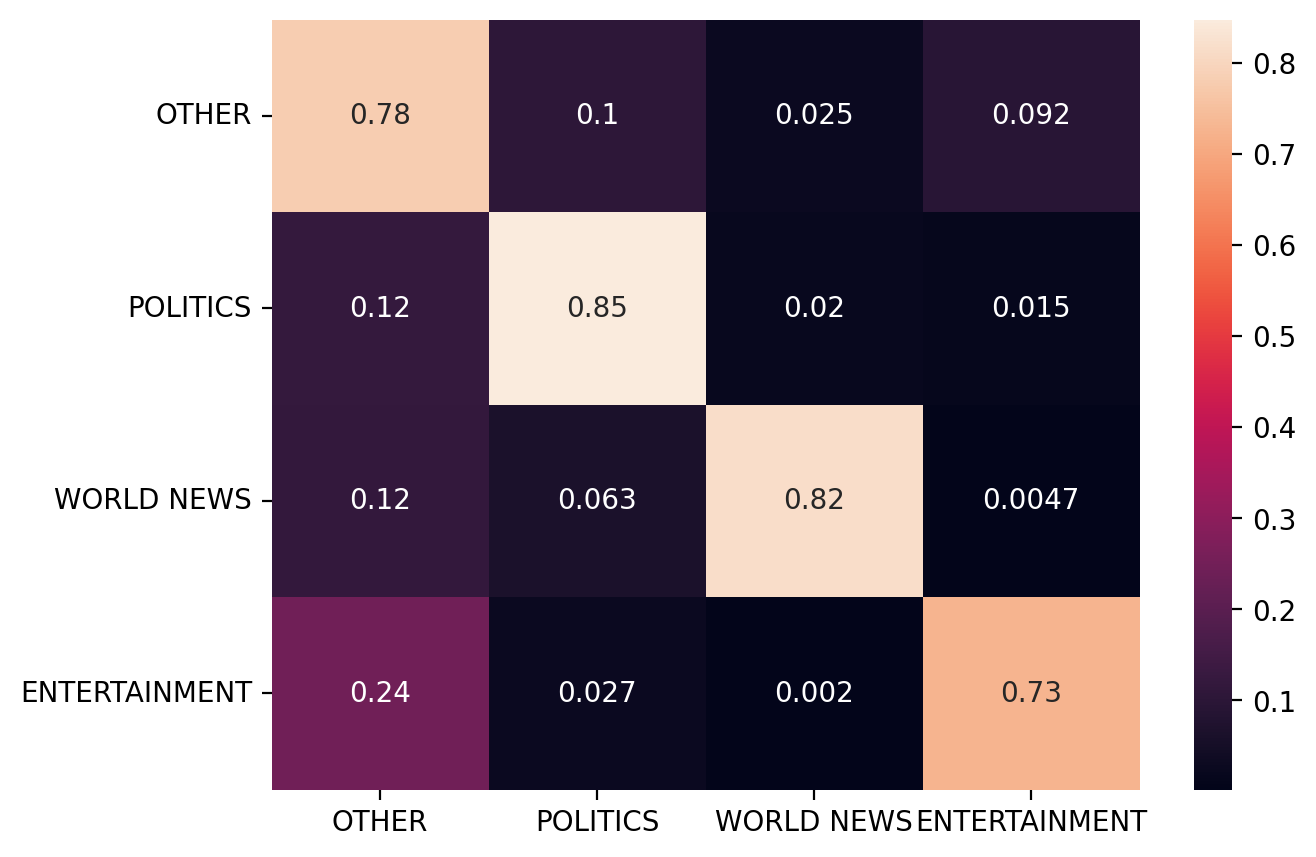

In [ ]:
optimizer = ['adam']

tuned_parameters = {
    'solver': optimizer,
}

clf = MLPClassifier(hidden_layer_sizes = (128, 256, 128), early_stopping=True, random_state = 42, max_iter = 1000)

mlp = GridSearchCV(clf, tuned_parameters, cv=5)

mlp.fit(X_tfidf_train, Y_train)

print(mlp.best_estimator_)

# -----------------------------------------------------------------
train_accuracy = mlp.score(X_tfidf_train, Y_train)

tik = time.process_time()
test_accuracy = mlp.score(X_tfidf_test, Y_test)
tok = time.process_time()

print("\nTrain accuracy = %.4f " %train_accuracy)
print("Test accuracy = %.4f" %test_accuracy)

print("\nAverage test inference time = %4.7f [s/sample]" %((tok-tik)/X_tfidf_test.shape[0]))


# Test confusion matrix
Y_pred = mlp.predict(X_tfidf_test)

CM = metrics.confusion_matrix(Y_test, Y_pred, normalize='true')
plt.figure(figsize=(7,5))
sn.heatmap(CM, annot=True, xticklabels = Yclasses, yticklabels=Yclasses)
plt.show()

### 3.3 Word Embeddings

In [ ]:
# TRAIN-TEST SPLIT
X_w2v_train, X_w2v_test, Y_train, Y_test = train_test_split(X_w2v, Y, test_size = 0.35, random_state = 42, stratify=Y)

print("Trainset class balance: ", Counter(Y_train))
print("Testset class balance: ", Counter(Y_test))

Trainset class balance:  Counter({0: 4099, 1: 3927, 3: 1904, 2: 794})
Testset class balance:  Counter({0: 2207, 1: 2115, 3: 1025, 2: 428})


In [ ]:
# NORMALIZATION
scaler = preprocessing.StandardScaler().fit(X_w2v_train)

X_w2v_train = scaler.transform(X_w2v_train) 
X_w2v_test = scaler.transform(X_w2v_test)

#### 3.3.1 SVM

SVC(C=8)

Train accuracy = 0.8047 
Test accuracy = 0.7652

Average test inference time = 0.0020203 [s/sample]


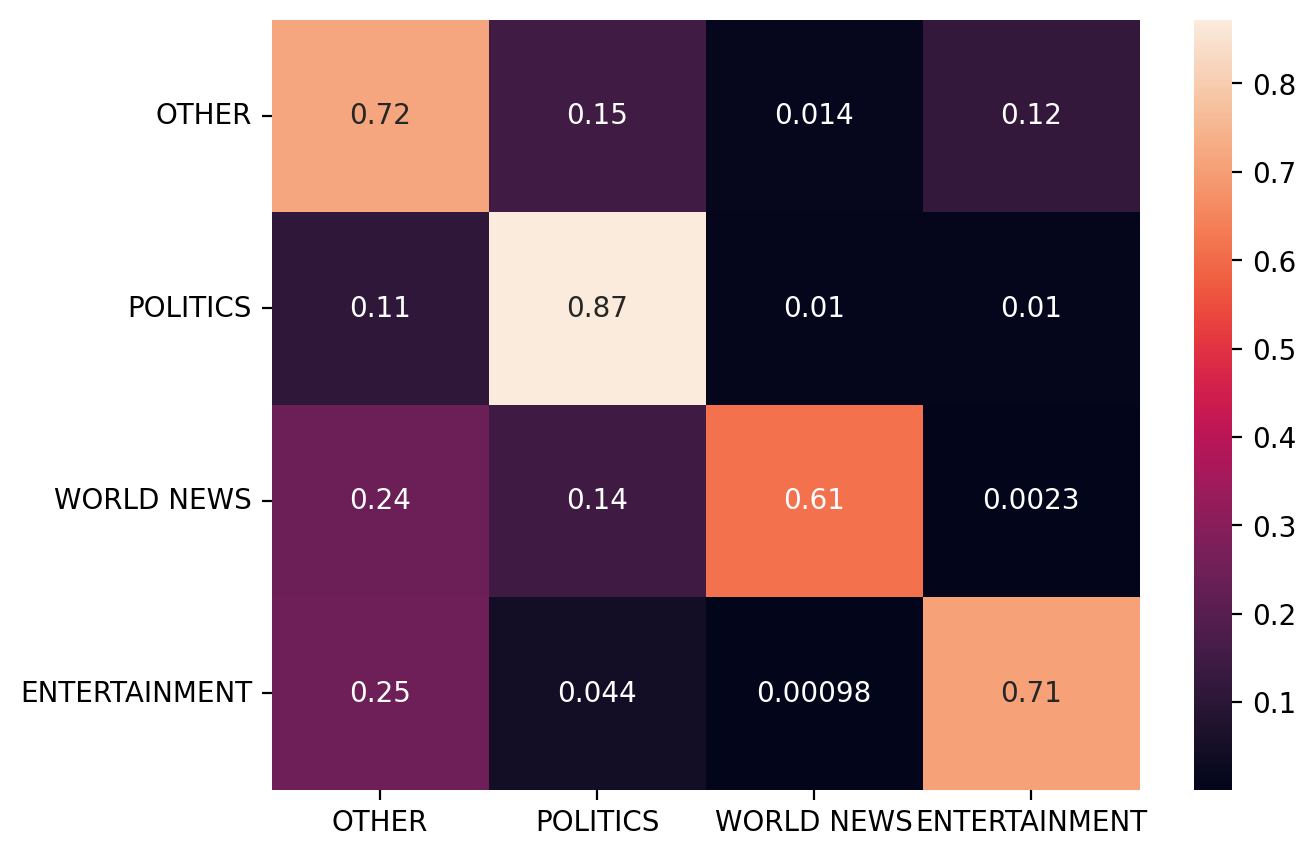

In [ ]:
rang_C =  range(1, 10, 1)
kernels = ['rbf']

tuned_parameters = {
    'C': rang_C,
    'kernel': kernels
}

clf = SVC()

svm = GridSearchCV(clf, param_grid=tuned_parameters, cv=5)

svm.fit(X_w2v_train, Y_train)

print(svm.best_estimator_)


# -----------------------------------------------------------------
train_accuracy = svm.score(X_w2v_train, Y_train)

tik = time.process_time()
test_accuracy = svm.score(X_w2v_test, Y_test)
tok = time.process_time()

print("\nTrain accuracy = %.4f " %train_accuracy)
print("Test accuracy = %.4f" %test_accuracy)

print("\nAverage test inference time = %4.7f [s/sample]" %((tok-tik)/X_w2v_test.shape[0]))

# Test confusion matrix
Y_pred = svm.predict(X_w2v_test)

CM = metrics.confusion_matrix(Y_test, Y_pred, normalize='true')
plt.figure(figsize=(7,5))
sn.heatmap(CM, annot=True, xticklabels = Yclasses, yticklabels=Yclasses)
plt.show()


#### 3.3.2 Random Forest

RandomForestClassifier(max_depth=3, n_estimators=60)

Train accuracy = 0.6789 
Test accuracy = 0.6706

Average test inference time = 0.0000076 [s/sample]


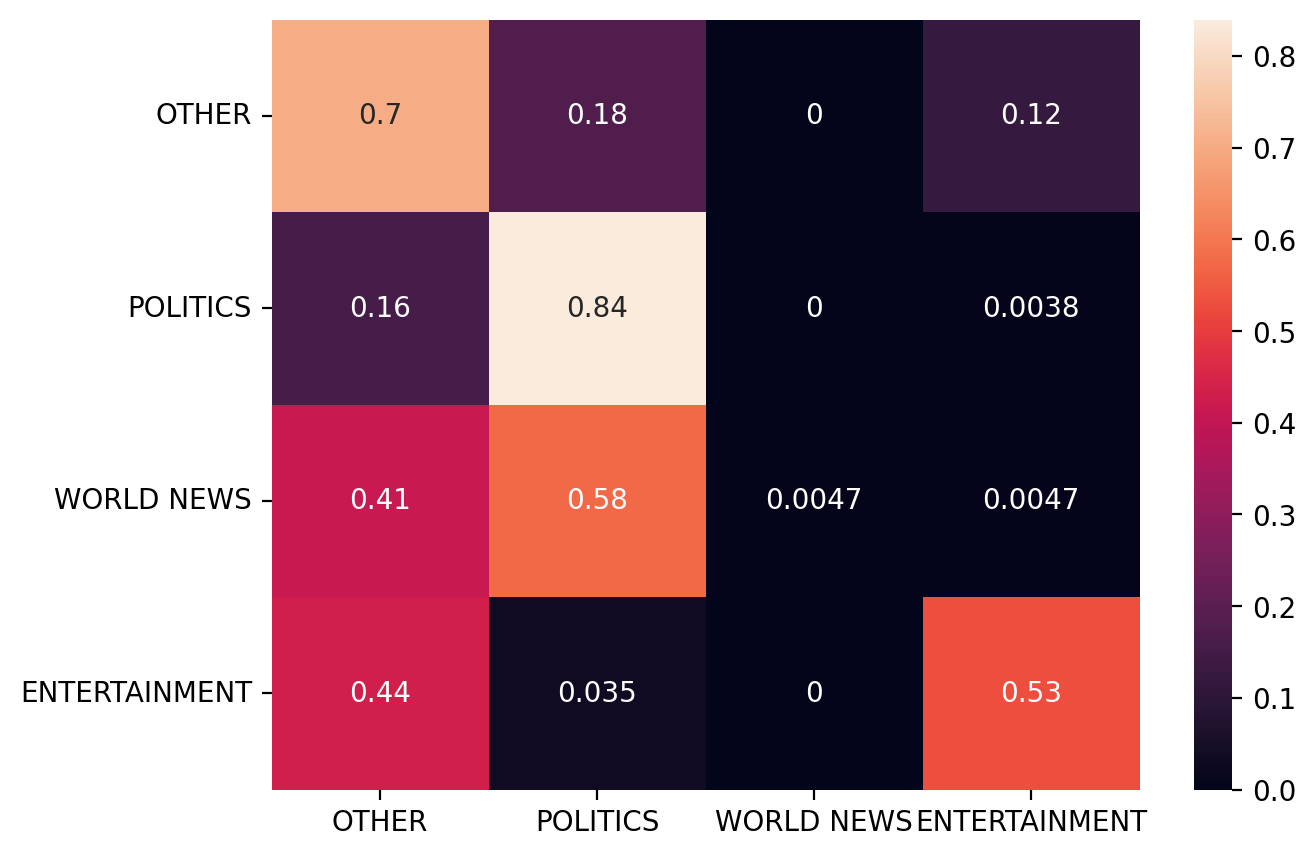

In [ ]:
T = 100
num_trees = range(5, T, 5)
depth = [2, 3]

tuned_parameters = {
    'n_estimators': num_trees,
    'max_depth': depth
}

clf = RandomForestClassifier()

rf = GridSearchCV(clf, tuned_parameters, cv=5)
rf.fit(X_w2v_train, Y_train)

print(rf.best_estimator_)
# -----------------------------------------------------------------
train_accuracy = rf.score(X_w2v_train, Y_train)

tik = time.process_time()
test_accuracy = rf.score(X_w2v_test, Y_test)
tok = time.process_time()

print("\nTrain accuracy = %.4f " %train_accuracy)
print("Test accuracy = %.4f" %test_accuracy)

print("\nAverage test inference time = %4.7f [s/sample]" %((tok-tik)/X_w2v_test.shape[0]))


# Test confusion matrix
Y_pred = rf.predict(X_w2v_test)

CM = metrics.confusion_matrix(Y_test, Y_pred, normalize='true')
plt.figure(figsize=(7,5))
sn.heatmap(CM, annot=True, xticklabels = Yclasses, yticklabels=Yclasses)
plt.show()

#### 3.3.3 MLP

MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 256, 128),
              max_iter=1000, random_state=42)

Train accuracy = 0.7983 
Test accuracy = 0.7650

Average test inference time = 0.0000115 [s/sample]


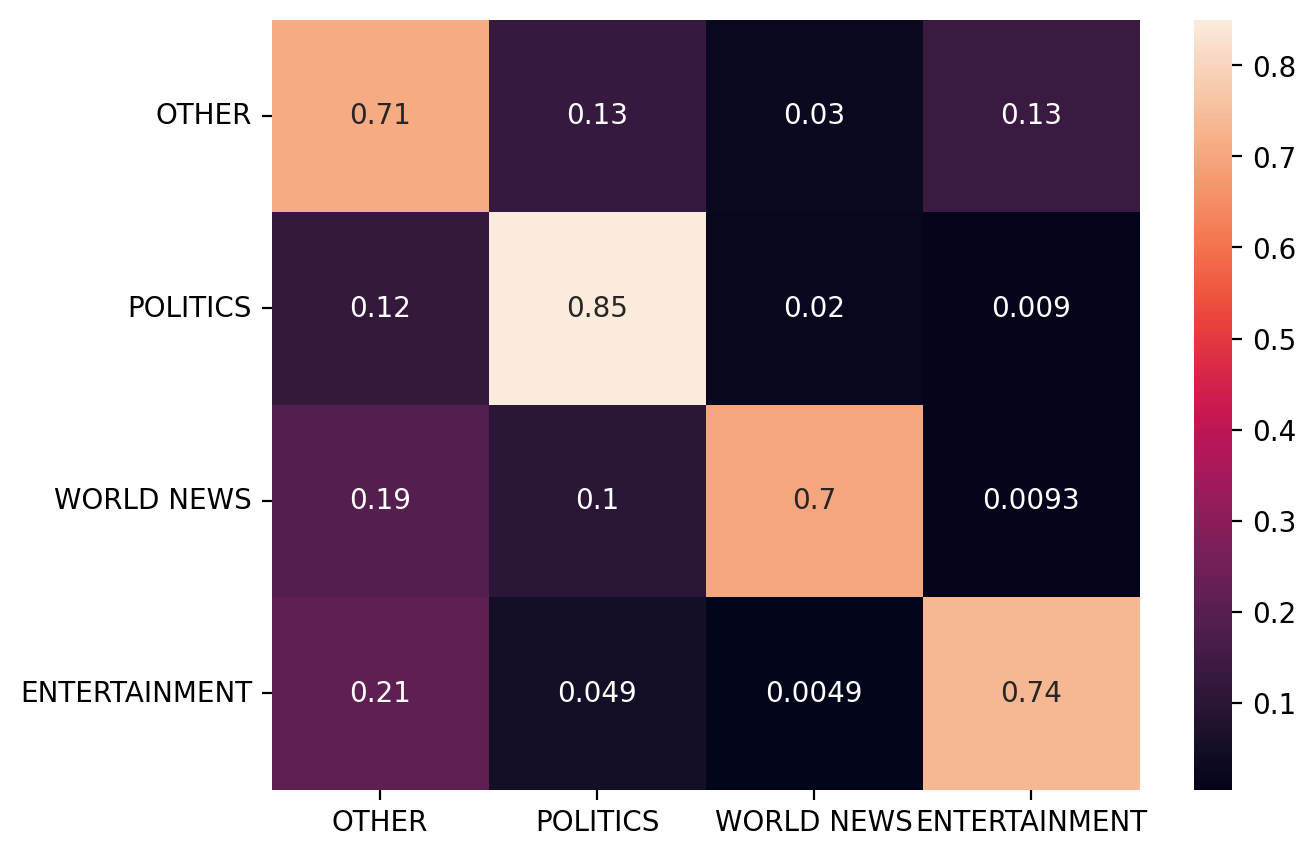

In [ ]:
optimizer = ['adam']

tuned_parameters = {
    'solver': optimizer,
}

clf = MLPClassifier(hidden_layer_sizes = (128, 256, 128), early_stopping=True, random_state = 42, max_iter = 1000)

mlp = GridSearchCV(clf, tuned_parameters, cv=5)

mlp.fit(X_w2v_train, Y_train)

print(mlp.best_estimator_)


# -----------------------------------------------------------------
train_accuracy = mlp.score(X_w2v_train, Y_train)

tik = time.process_time()
test_accuracy = mlp.score(X_w2v_test, Y_test)
tok = time.process_time()

print("\nTrain accuracy = %.4f " %train_accuracy)
print("Test accuracy = %.4f" %test_accuracy)

print("\nAverage test inference time = %4.7f [s/sample]" %((tok-tik)/X_w2v_test.shape[0]))


# Test confusion matrix
Y_pred = mlp.predict(X_w2v_test)

CM = metrics.confusion_matrix(Y_test, Y_pred, normalize='true')
plt.figure(figsize=(7,5))
sn.heatmap(CM, annot=True, xticklabels = Yclasses, yticklabels=Yclasses)
plt.show()

### 3.4 LDA Topic representation

In [ ]:
from gensim.matutils import corpus2dense, corpus2csc
from scipy.sparse import lil_matrix, csr_matrix

#FROM SPARSE TO DENSE TOPIC REPRESENTATION
num_docs = D.num_docs

mycorpus_topics = np.transpose(corpus2dense(topics_in_doc, n_topic, num_docs))

#BACK TO SPARSE
X_topics = lil_matrix(mycorpus_topics)
print(X_topics.shape)

(16499, 40)


In [ ]:
# TRAIN-TEST SPLIT
X_topics_train, X_topics_test, Y_train, Y_test = train_test_split(X_topics, Y, test_size = 0.35, random_state = 42, stratify=Y)

print("Train: ", X_topics_train.shape[0])
print("Test: ", X_topics_test.shape[0])

Train:  10724
Test:  5775


#### 3.4.1 SVM

SVC(C=3)

Train accuracy = 0.8421 
Test accuracy = 0.7711

Average test inference time = 0.0007554 [s/sample]


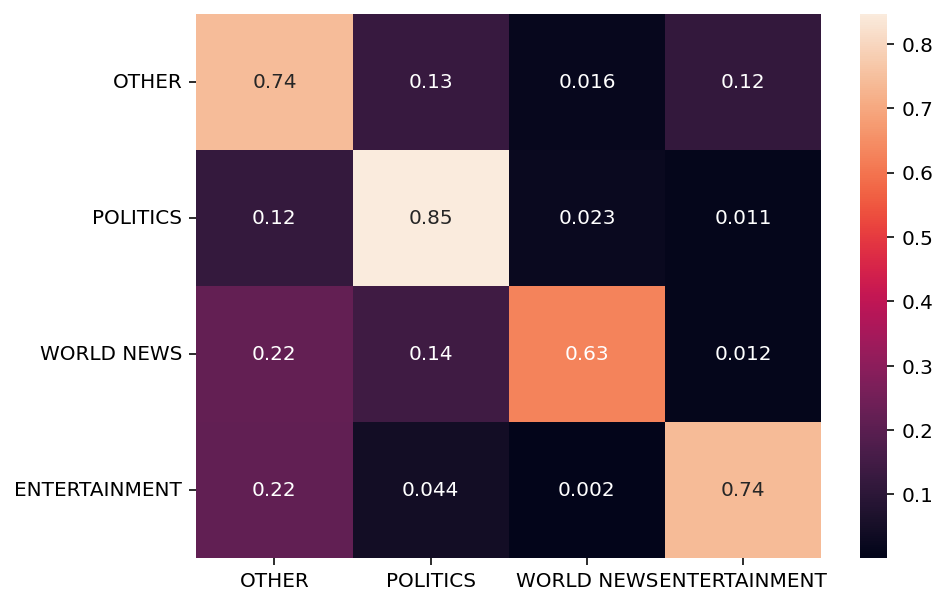

In [ ]:
rang_C =  range(1, 10, 1)
kernels = ['rbf']

tuned_parameters = {
    'C': rang_C,
    'kernel': kernels
}

clf = SVC()

svm = GridSearchCV(clf, param_grid=tuned_parameters, cv=5)

svm.fit(X_topics_train, Y_train)

print(svm.best_estimator_)


# -----------------------------------------------------------------
train_accuracy = svm.score(X_topics_train, Y_train)

tik = time.process_time()
test_accuracy = svm.score(X_topics_test, Y_test)
tok = time.process_time()

print("\nTrain accuracy = %.4f " %train_accuracy)
print("Test accuracy = %.4f" %test_accuracy)

print("\nAverage test inference time = %4.7f [s/sample]" %((tok-tik)/X_topics_test.shape[0]))

# Test confusion matrix
Y_pred = svm.predict(X_topics_test)

CM = metrics.confusion_matrix(Y_test, Y_pred, normalize='true')
plt.figure(figsize=(7,5))
sn.heatmap(CM, annot=True, xticklabels = Yclasses, yticklabels=Yclasses)
plt.show()


#### 3.4.2 Random Forest

RandomForestClassifier(max_depth=3, n_estimators=85)

Train accuracy = 0.6499 
Test accuracy = 0.6377

Average test inference time = 0.0000122 [s/sample]


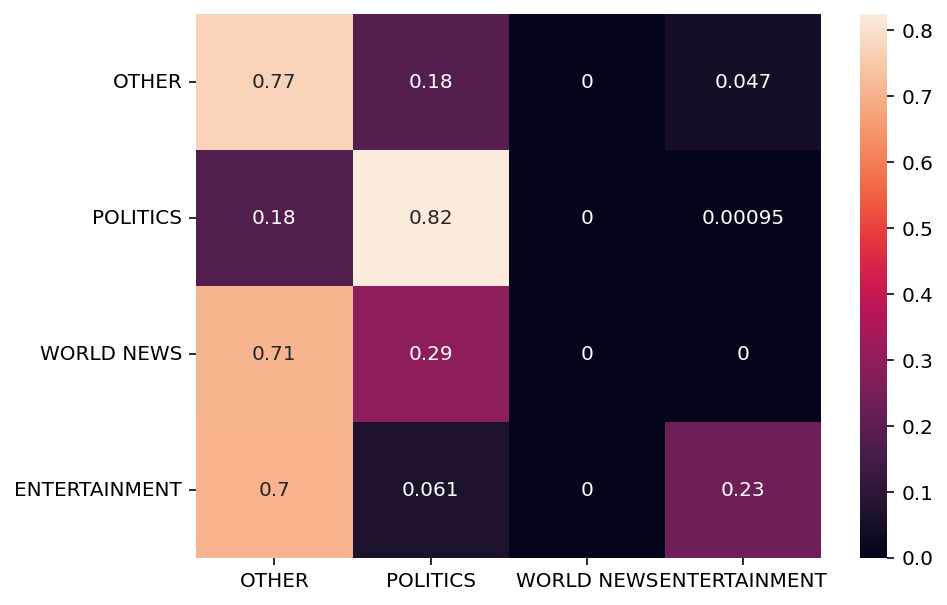

In [ ]:
T = 100
num_trees = range(5, T, 5)
depth = [2, 3]

tuned_parameters = {
    'n_estimators': num_trees,
    'max_depth': depth
}

clf = RandomForestClassifier()

rf = GridSearchCV(clf, tuned_parameters, cv=5)
rf.fit(X_topics_train, Y_train)

print(rf.best_estimator_)

# -----------------------------------------------------------------
train_accuracy = rf.score(X_topics_train, Y_train)

tik = time.process_time()
test_accuracy = rf.score(X_topics_test, Y_test)
tok = time.process_time()

print("\nTrain accuracy = %.4f " %train_accuracy)
print("Test accuracy = %.4f" %test_accuracy)

print("\nAverage test inference time = %4.7f [s/sample]" %((tok-tik)/X_topics_test.shape[0]))


# Test confusion matrix
Y_pred = rf.predict(X_topics_test)

CM = metrics.confusion_matrix(Y_test, Y_pred, normalize='true')
plt.figure(figsize=(7,5))
sn.heatmap(CM, annot=True, xticklabels = Yclasses, yticklabels=Yclasses)
plt.show()

#### 3.4.3 MLP

MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 256, 128),
              max_iter=1000, random_state=42)

Train accuracy = 0.7949 
Test accuracy = 0.7666

Average test inference time = 0.0000159 [s/sample]


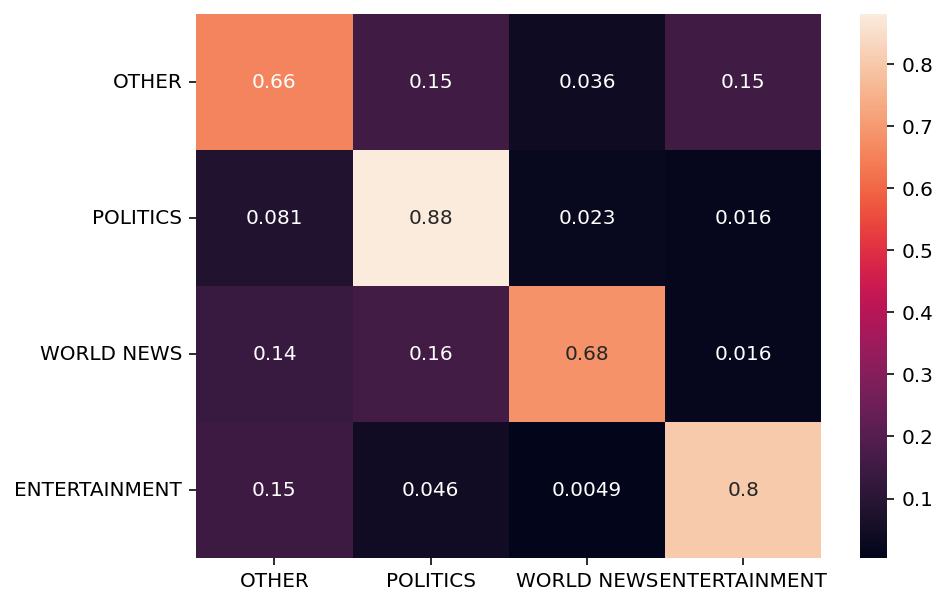

In [ ]:
optimizer = ['adam']

tuned_parameters = {
    'solver': optimizer,
}

clf = MLPClassifier(hidden_layer_sizes = (128, 256, 128), early_stopping=True, random_state = 42, max_iter = 1000)

mlp = GridSearchCV(clf, tuned_parameters, cv=5)

mlp.fit(X_topics_train, Y_train)

print(mlp.best_estimator_)

# -----------------------------------------------------------------
train_accuracy = mlp.score(X_topics_train, Y_train)

tik = time.process_time()
test_accuracy = mlp.score(X_topics_test, Y_test)
tok = time.process_time()

print("\nTrain accuracy = %.4f " %train_accuracy)
print("Test accuracy = %.4f" %test_accuracy)

print("\nAverage test inference time = %4.7f [s/sample]" %((tok-tik)/X_topics_test.shape[0]))


# Test confusion matrix
Y_pred = mlp.predict(X_topics_test)

CM = metrics.confusion_matrix(Y_test, Y_pred, normalize='true')
plt.figure(figsize=(7,5))
sn.heatmap(CM, annot=True, xticklabels = Yclasses, yticklabels=Yclasses)
plt.show()

### 3.5 Transformers

For the fine-tuning of a pretrained Transformer, we need to follow a few extra steps.

First, for the sake of simplicity, we are going to create a new dataframe with just the text of the articles (as the strings directly retrieved from the website) and the one-hot encoded labels, as it is required for the model.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#One-hot encode labels (as expected from the model)
Y_oh = list(OneHotEncoder(sparse_output=False).fit_transform(Y[:,None]))

#Create a new dataframe with just the text and the label

news_dataframe = corpus_df[['news']].copy()
news_dataframe['labels'] = Y_oh


We split train and test, returning the same partition we got with the previous methods. Then, we further split train into train and validation.

In [ ]:
# TRAIN-TEST SPLIT
train_valid, test, Ytrain_val, Ytest = train_test_split(news_dataframe, Y, test_size = 0.35, random_state = 42, stratify=Y)

# SPLIT TRAIN INTO TRAIN AND VALIDATION TO LEAVE THE TEST SET UNTOUCHED
train, val, Ytrain, Yval = train_test_split(train_valid, Ytrain_val, test_size = 0.2, random_state=42, stratify=Ytrain_val)

Create a DatasetDict object with the three sets.

In [ ]:
from datasets import DatasetDict, Dataset

news_dataset = DatasetDict({
    "train": Dataset.from_pandas(train),
    "test": Dataset.from_pandas(test),
    "val": Dataset.from_pandas(val),
    })

news_dataset

DatasetDict({
    train: Dataset({
        features: ['news', 'labels', '__index_level_0__'],
        num_rows: 8579
    })
    test: Dataset({
        features: ['news', 'labels', '__index_level_0__'],
        num_rows: 5775
    })
    val: Dataset({
        features: ['news', 'labels', '__index_level_0__'],
        num_rows: 2145
    })
})

We select the **DistilBERT** model from the Hugging Face library, as it is one of the many architectures suitable for text classification. 

In the following cell we define the tokenizer from the checkpoint and apply it to the dataset.

In [ ]:
from transformers import AutoTokenizer

checkpoint_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint_name)


def preprocess_function(example):
    return tokenizer(example["news"], padding=True, truncation=True)

#Tokenize dataset
tokenized_news = news_dataset.map(preprocess_function)    

Map:   0%|          | 0/8579 [00:00<?, ? examples/s]

Map:   0%|          | 0/5775 [00:00<?, ? examples/s]

Map:   0%|          | 0/2145 [00:00<?, ? examples/s]

Now we define the collator and the training arguments. Except for the *output directory*, the rest have been left as they are by default. For the evaluation of the training process we define the ```compute_metrics``` function as the **accuracy score**. 

In [ ]:
from transformers import DataCollatorWithPadding
from transformers import TrainingArguments
import evaluate


data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

training_args = TrainingArguments(
    output_dir=f"{checkpoint_name}-finetuned",
    per_device_train_batch_size=16,                                             
    per_device_eval_batch_size=16,                                              
    num_train_epochs=5,                                                         
    evaluation_strategy="epoch",                                                
    logging_strategy="epoch",                                                   
    save_strategy="epoch",                                                      
    learning_rate=2e-5,                                                         
    load_best_model_at_end=True,                                                
    metric_for_best_model='accuracy',                                           
    seed=42,                                                                    
)

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    labels = np.argmax(labels, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

Instantiate the model for multilabel sequence classification. 

In [ ]:
from transformers import AutoModelForSequenceClassification

id2label = {0: "OTHER", 1: "POLITICS", 2: "WORLD NEWS", 3: "ENTERTAINMENT"}
label2id = {"OTHER": 0, "POLITICS": 1, "WORLD NEWS": 2, "ENTERTAINMENT": 3}

model = AutoModelForSequenceClassification.from_pretrained(checkpoint_name, 
                                                           num_labels=4, 
                                                           id2label=id2label, 
                                                           label2id=label2id,
                                                           problem_type="multi_label_classification")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classi

In [ ]:
from transformers import Trainer, EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_news["train"],
    eval_dataset=tokenized_news["val"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=1, early_stopping_threshold=0.0)]

)

trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.288100,0.224795,0.819580
2,0.187700,0.208683,0.823310
3,0.137700,0.224873,0.833566
4,0.100800,0.236334,0.843823
5,0.073700,0.249825,0.840093


TrainOutput(global_step=2685, training_loss=0.1576015863116671, metrics={'train_runtime': 2332.2452, 'train_samples_per_second': 18.392, 'train_steps_per_second': 1.151, 'total_flos': 5682391732899840.0, 'train_loss': 0.1576015863116671, 'epoch': 5.0})

Evaluate the model as previously done.


Train accuracy = 0.9642 
Test accuracy = 0.8286

Average test inference time = 0.0174252 [s/sample]


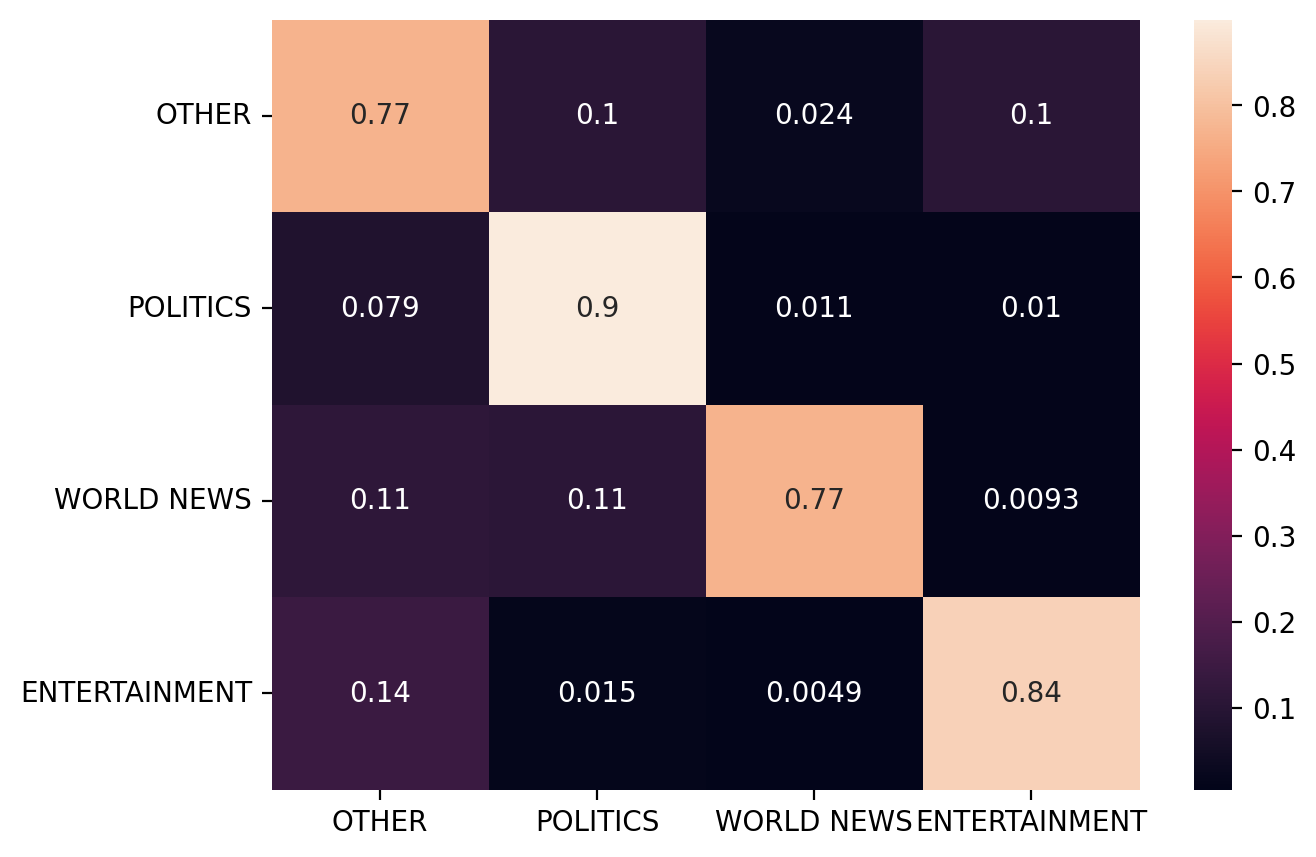

In [ ]:
# TEST
# -----------------------------------------------------------------

#Train
train_predictions = trainer.predict(tokenized_news["train"])
y_pred = np.argmax(train_predictions.predictions, axis=1)
train_accuracy = metrics.accuracy_score(y_true = Ytrain, y_pred = y_pred)


#Test
tik = time.process_time()
test_predictions = trainer.predict(tokenized_news["test"])
tok = time.process_time()

y_pred = np.argmax(test_predictions.predictions, axis=1)

test_accuracy = metrics.accuracy_score(y_true = Ytest, y_pred = y_pred)


print("\nTrain accuracy = %.4f " %train_accuracy)
print("Test accuracy = %.4f" %test_accuracy)

print("\nAverage test inference time = %4.7f [s/sample]" %((tok-tik)/len(Ytest)))

CM = metrics.confusion_matrix(Ytest, y_pred, normalize='true')
plt.figure(figsize=(7,5))
sn.heatmap(CM, annot=True, xticklabels = Yclasses, yticklabels=Yclasses)
plt.show()

### 3.6 Summary of the results


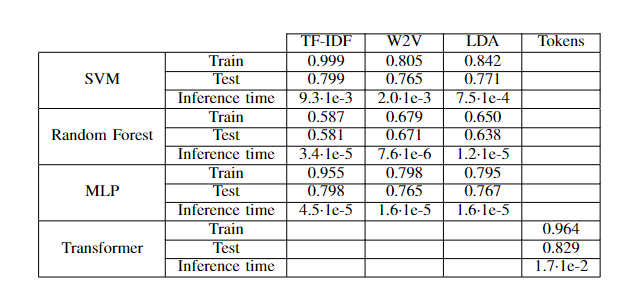



## References

1. Misra, Rishabh. "News Category Dataset." arXiv preprint arXiv:2209.11429 (2022).
2. Misra, Rishabh and Jigyasa Grover. "Sculpting Data for ML: The first act of Machine Learning." ISBN 9798585463570 (2021).
3. Piotr Bojanowski et al. “Enriching Word Vectors with
Subword Information”. In: Transactions of the Associ-
ation for Computational Linguistics 5 (2017), pp. 135–146. ISSN: 2307-387X.
4.Andrew Kachites McCallum. “MALLET: A
Machine Learning for Language Toolkit”.
http://mallet.cs.umass.edu. 2002.
5. Carson Sievert and Kenneth Shirley. “LDAvis: A
method for visualizing and interpreting topics”. In:
Proceedings of the workshop on interactive language
learning, visualization, and interfaces. 2014, pp. 63–70.
6. Victor Sanh et al. “DistilBERT, a distilled version of
BERT: smaller, faster, cheaper and lighter”. In: ArXiv
abs/1910.01108 (2019).
7. Huffpost. URL: https://www.huffpost.com/.
